# Outliers in the Data

<img src="../figures/outliers/desert_tree.jpg" style="width:700px;" alt="Tree in Desert">

In [1]:
%matplotlib inline
import math
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import linalg
from scipy import stats
from IPython.display import HTML

plt.rcdefaults()
plt.xkcd(scale=1, length=300, randomness=5)

## Outliers in Credit Card Transactions

<img src="../figures/outliers/ecommerce.jpg" style="width:800px;" alt="ecommerce">

Think about shopping online. You add something to your cart, proceed to check out, and fill out the payment information to complete the transaction. Perhaps you use your credit card to make the purchase and the whole process can be done within seconds. There is a chance, however, that someone else may have stolen your credit card information and pretend to be you when making those purchases. 

Credit card fraud detection has become an extremely important component of today's eCommerce. How can we detect frauds without seeing the consumers or criminals face to face? The key is how we can differentiate suspicious transactions from normal activities. What is normal? What is abnormal? In terms of data science, what are the anomalies or outliers? 

## Outliers

An outlier is

> a data object that deviates significantly from the rest of the objects. 

<img src="../figures/outliers/outliers.png" style="width:300px;float:right;" alt="ecommerce">

1. One model (process) generates normal data
2. A different process generates the outliers

Imagine if the normal data are those generated by a particular data model or process. An outlier is a data instance that deviates significantly from the rest of data -- something that must have been generated by a different model or process. 

Think about credit card transactions again. You, the person, is the model or process responsible for the normal transactions. The fraud transactions, however, do not come from you. The criminal generate them. The normal data and abnormal data, or outliers, may appear in the same dataset -- just like real and fraud transactions appear in the same monthly bill you receive -- they come from different models. 

### Outliers vs. Noise

Noise: 
+ Random error or variance
+ An inherent part of normal data
+ Ideally, to be distinguished from outliers

Noise sometimes may behave like outliers, e.g.
1. when you make a bigger purchase than normal
2. when you travel and shop in a different location

Outliers are to be distinguished from noise. Noise, by definition, is a random error or variance in a measured variable and is an inherent part of normal data. Noise comes from the same process that generates the data. It is there because of the randomness in the process or model. 

Using the credit card example, noise may come from situations when you make a bigger purchase than usual, or when you travel and shop in the location afar from home (and normal). But they are still the purchases you make, not something due to criminal activities. 

### Example: A NORMAL Spender

Imagine the amount of a normal purchase you make: 

**Mean and deviation**:

On average you purchase $\mu=20$ dollars with deviation $\sigma=10$

In [2]:
mu, sigma = 20, 10

Here we set the mean $\mu$ and standard deviation $\sigma$ to 20 and 10 respectively. 

**Normal Distribution** (Model):

Assume your purchase behavior follows a NORMAL distribution: 

In [28]:
purchases = np.random.normal(mu, sigma, 100)
print(purchases.astype(int))

[36 37 38 23 15 40 24 27 32 41 27 31 24 45 42 36 26 13 10 48 44 22 37 14
 32 42 31  9 33 21 28  8 27 24 17 17 20 36 12 23 24 35 37 21 25 24 39 27
 24 38 22 39 25 20 23 28 26 18 50  6 39 28 18 26 33 28 15 29 28 15 42 37
 44  9 14 30 28 31 21 25 31 55  8 32 45 27 27 22  5 34 38 21 40 41 21 35
 24 31 17 36]


We build the normal distribution model using your mean and deviation, and use it to simulate 100 purchases. Here, we use the NumPy's normal distribution model to generate the 100 purchase amounts, just like what you could have done. 

Now we show the distribution of your data using a histogram: 

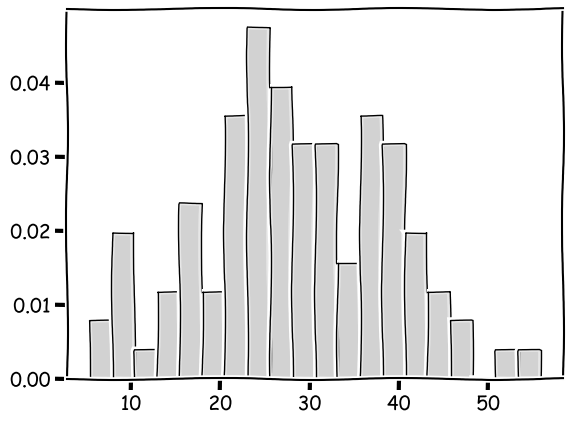

In [29]:
count, bins, ignored = plt.hist(purchases, 20, density=True, color=(0.1, 0.1, 0.1, 0.1), edgecolor="black")

#### Normal Density Distribution 

Compare to the normal distribution density function: 

\begin{eqnarray}
f(x) & = & \frac{1}{\sigma \sqrt{2\pi}} e^{- \left( {x - \mu } \right)^2 / 2\sigma^2}
\end{eqnarray}

Now that we assume the data follow a normal distribution -- and it does -- the data should follow the normal distribution curve. So let's compare the histogram to the NORMAL model that generates the data. 

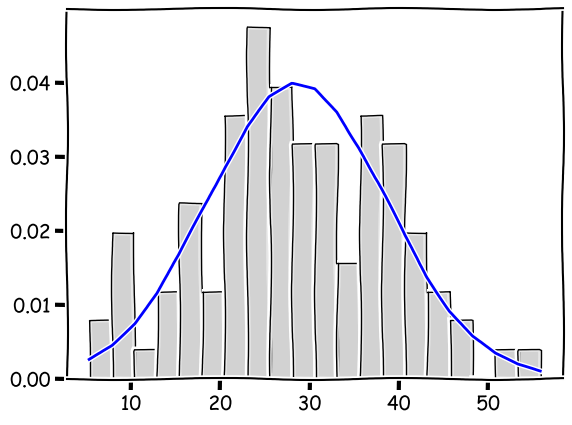

In [30]:
count, bins, ignored = plt.hist(purchases, 20, density=True, color=(0.1, 0.1, 0.1, 0.1), edgecolor="black")
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
                np.exp( - (bins - mu)**2 / (2 * sigma**2)),
                linewidth=2, color='b')
plt.show()

The blue curve depicts the MODEL, i.e. the normal distribution where the data come from. But it is easy to tell that the actual data, shown as the histogram, do not form the exact bell shape of the model. 

The actual spending, for example, may tend to have more purchases with a greater amount, than what the model suggests. This is because the model is probabilistic and comes with a degree of randomness. That leads to the variance in the data and unpredictability of individual data instances. 

And this is the noise, which may appear to be outliers but, in fact, comes from the one same model that generates all data here. 

### Types of Outliers

**Global outlier**, or point anomaly: 

> a data instance that significantly deviates from the rest

<img src="../figures/outliers/desert_tree.jpg" style="width:300px;float:right;" alt="Tree in Desert">

+ It's an outlier on its own
+ Regardless of the condition or context (subset)

Example: 
+ A fraud transaction vs. normal transactions
+ Computer intrusion vs. nomal access

**Contextual outlier**, or conditional outlier


> a data instance that deviates significantly in a specific context

<div style="width:300px; float:right; position: relative;text-align: center;">
    <img src="../figures/outliers/summer.jpg" style="width:100%;" alt="Summer">
    <div style="position:absolute; top:50%; left:50%; transform:translate(-50%, -50%); font-size:48pt;">
        <font style="color:blue; background-color: white;">32&deg;F?</font>
    </div>
</div>
    
+ Related attribute values look normal globally
+ But abnormal in certain conditions / context
+ Context defined by other attributes

Example: 
+ A temperature of **32 &deg;F**... in *Summer* time *Florida*

**Collective Outliers**
> a subset of data instances collectively deviate significantly from the whole data set

+ Even if the individual data instances may not be outliers
+ Behavior of **groups**; can be multiple groups of outliers
+ In the context of **other data** and their **relations**

Example: 
+ A group of computers sending DoS traffic

These are the basic types of outliers. The main takeaway here is that they come from a different process than that generates normal data. And we shall look at an example to see how this is the case. 

### Classic Example: Belgium International Phone Calls

The numbers of international phone calls (millions) from Belgium during 1950 - 1973: 

In [6]:
phones = pd.read_csv("data/phones.csv")
phones[['year','calls']].head(10)

year  calls
0    50    4.4
1    51    4.7
2    52    4.7
3    53    5.9
4    54    6.6
5    55    7.3
6    56    8.1
7    57    8.8
8    58   10.6
9    59   12.0

In [7]:
phones[['year','calls']].describe()

year       calls
count  24.000000   24.000000
mean   61.500000   49.991667
std     7.071068   65.532109
min    50.000000    4.400000
25%    55.750000    7.900000
50%    61.500000   15.500000
75%    67.250000   62.000000
max    73.000000  212.000000

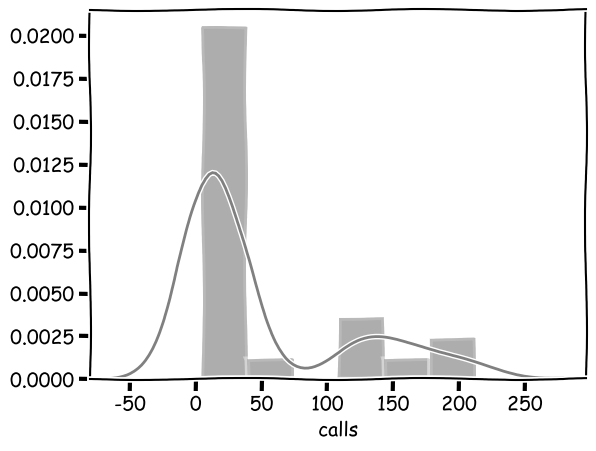

In [8]:
sns.distplot(phones["calls"], color="gray")

In [9]:
phones[['year','calls']].corr(method="pearson")

year     calls
year   1.000000  0.543987
calls  0.543987  1.000000

#### Linear Regression

LSM, based on least squares (**mean**): 
+ **Mean** square errors to be minimized
+ Tries to fit all values

If we conduct a linear regression based on the classic method of least squares, which is to minimize the **mean** squared errors, we obtain: 

In [10]:
from sklearn.linear_model import LinearRegression

x = phones['year'].values.reshape(-1,1)
y = phones['calls'].values.reshape(-1,1)

def lsm_from_mean():
    lsm = LinearRegression()
    lsm.fit(x, y)
    # print(lsm.intercept_, lsm.coef_)
    global yp 
    yp = lsm.predict(x)

    # plt.scatter(x, y,  color='gray')
    plt.plot(x, yp, color='red', linewidth=2)
    plt.xlabel("Year")
    plt.ylabel("# Calls (tens of millions)")
    plt.show()

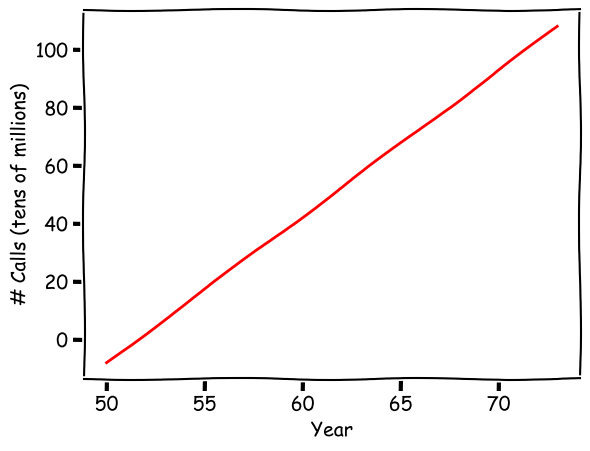

In [11]:
lsm_from_mean()

The linear regression model shows the positive relation between year and the number of phone calls. Over time, there is an increasing number of calls from Belgium, which makes sense. 

Again, the regression model here is to minimize the mean square errors. As a result, the model tries to fit the regression line along the mean values over the years. Every data point matters in this model. 

#### Robust Linear Regression

LAD, least absolute deviation from the median: 
+ A quantile regression, with q=0.5 (median)
+ Robust regression models
+ **Median**, instead of mean, deviation
+ **Least affected by extreme values**, e.g. outliers

An alternative regression technique is refered to as the Quantile Regression, which is part of a family of techniques for robust regression. We know that the quantitle at 0.5 or 50% is the middle of all values and is the median. So a quantile regression with q=0.5 is "median regression," based on least absolute deviation. 

In this case, when fitting the model, values and errors in the middle have a greater impact on the regression model. Extreme values, which are at the two ends of a distribution, will hardly have any impact on the median and they  do not affect the outcome. So outliers will be less likely to impact the results. 

In [12]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

def lad_from_median():
    # rlm = sm.RLM(x, y, M=sm.robust.norms.HuberT())
    rlm = smf.quantreg('calls ~ year', phones)
    rlm_res = rlm.fit(q=0.5)
    # print(rlm_res.summary())
    global yp2
    yp2 = rlm_res.params[0] + x * rlm_res.params[1]

    # plt.scatter(x, y,  color='gray')
    plt.xlabel("Year")
    plt.ylabel("# Calls (millions)")
    plt.plot(x, yp, color='red', linewidth=2, label="Least Square (Mean)")
    plt.plot(x, yp2, color='blue', linewidth=2, label="Least Deviation (Median)")
    plt.legend()
    plt.show()

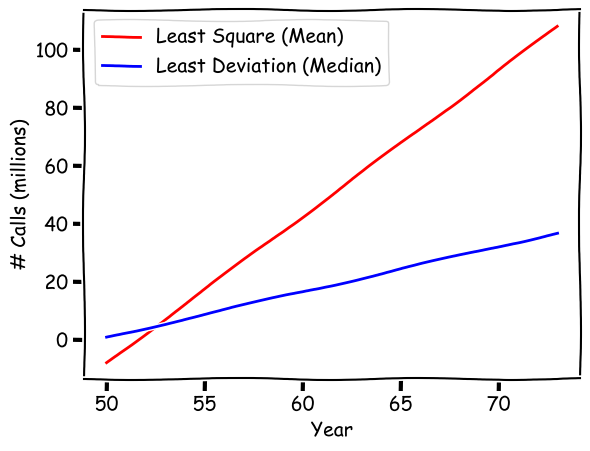

In [13]:
lad_from_median()

Now after we perform the "median regression", we can compare its regression line (the blue one) to the regression based on least mean squares (the red line). The two lines are very different. In particular, the least mean square model has a much steep regression line. What happened? 

In [14]:
def show_data():
    plt.scatter(x, y,  color='gray', label="Data")
    plt.xlabel("Year")
    plt.ylabel("# Calls (millions)")
    plt.plot(x, yp, color='red', linewidth=2, label="Least Square (Mean)")
    plt.plot(x, yp2, color='blue', linewidth=2, label="Least Deviation (Median)")
    plt.legend()
    plt.show()

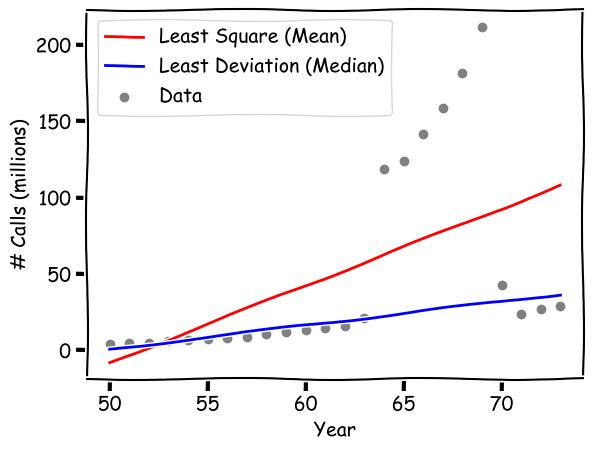

In [15]:
show_data()

Now if we plot the actual data, the figure gives us some clues about what make the difference. 

As shown in the data, there are anomalies in the data, specifically during years 1964 - 1969, where the numbers of calls appear to be unsually greater. 

The model based on least mean squares, the red line, is fitting the regression line in terms of mean squared errors. The mean, as we know, is affected by all values. So essentially, the least mean square model is trying to "please" every single data points and the group of outliers will have a major impact on the final regression line, which goes in between the normal data points and outliers. 

The "median regression" (so to speak), the blue line, is immune to the outliers because it relies on the median deviation. As you can see, it fits the normal data points very well. 

But what are the outliers? What do they represent? Where do they come from? 

In [16]:
def show_data_groups():
    phones1 = phones[phones["calls"]<100]
    plt.scatter(phones1["year"], phones1["calls"],  color='black', label="Number of Calls")
    phones2 = phones[phones["calls"]>=100]
    plt.scatter(phones2["year"], phones2["calls"],  color='red', label="Calls in Minutes (mistaken)")
    plt.xlabel("Year")
    plt.ylabel("# Calls (millions)")
#     plt.plot(x, yp, color='red', linewidth=2, label="Least Square (Mean)")
#     plt.plot(x, yp2, color='blue', linewidth=2, label="Least Deviation (Median)")
    plt.legend()
    plt.show()

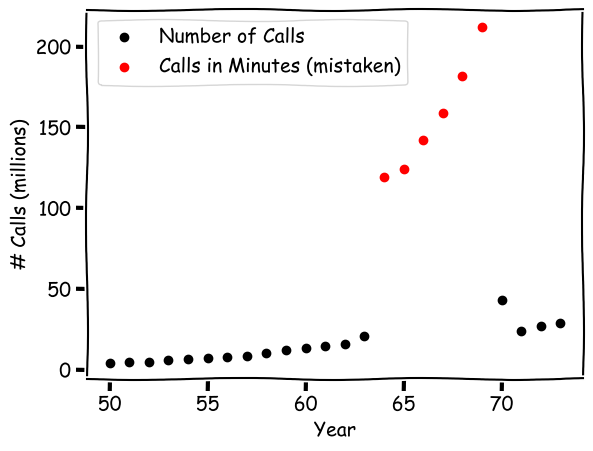

In [17]:
show_data_groups()

In our definition of outliers, we declare that they must have come from a process or model different from the one that generates the normal data. So if the normal data points come from the number of phone calls Belgium people make? What the outliers? 

It turns out that the outliers are still about phone calls from people in Belgium. However, they were mistakenly recorded as the number of minutes, instead of counts of individual calls. So while the black normal data points come from a "counting" process, and the red outliers come from the time log. They are indeed two separate models. 

### Challenges of Outlier Detection

+ Normal data vs. outliers: no clear border
+ Outliers as departure: what similarity or distance? 
+ Outliers vs. noise: data quality and blurred distinction
+ Meaning of outliers in applications

In the Belgium phone calls example, the outliers show a clear a departure from the normal data points. These can be observed through visualization and detected or alleviated by methods such as robust linear regression. This serves as an example where the distinction is clear and outliers are easy to detect. 

In many other real world applications, however, the distinction between normal data and outlier may not be a clear cut. We may not be able to draw a clear border between the two. There is often a gray area and it is hard to tell what is normal vs. abnormal behavior in the data. 

And when we discuss outliers as some form of departure from normal data, it requires a measurement of the departure. Technically, we need to choose a specific similarity or distance measure so that such a departure can be quantified. There have been many useful measures that we can potentially use. The bad news is, the effectiveness of these measures is domain dependent and none of these are universally applicable. 

We mentioned earlier that outliers are difference noise, which is dues to data variance and comes from the same random process that generates normal data. The distinction between outliers and noise is an important one; however, to distinguish them properly in the actual data is a difficult task. In certain variables or dimensions, data values of outliers and noise may have overlapped, creating outliers or noise in disguise. 

Finally, what is the purpose of detecting outliers? What do the outliers mean and imply? These are question relevant to specific problems you try to attack with data mining. Understanding them and thier implications is important. 

## Outlier Detection Methods

<img src="../figures/outliers/calls2.png" style="width:700px;" alt="Tree in Desert">

In terms of the level of **supervision**: 
+ Supervised methods: a classification problem
+ Unsupervised methods: a "clustering" approach
+ Semi-supervised methods: some combination of both

There are many different approaches to outlier detection. In terms of the level of supervision, or human input, they can be categorized as: supervised methods based on data classification or categorization, unsupervised methods or those based on data clustering, and semi-supervised methods which combine the two methods. 

In terms of methods to distinguish outliers from normal: 
+ Statistical methods: model-based methods
+ Proximity-based methods: distance or density-based
+ Clustering-based methods: small or sparse groups

You can also think of the mechanism to find outliers. Statistical methods include those based on very specific assumption and data distribution models that generate the data, from which the likelihood of normal vs. outlier data can be inferred. Proximity-based methods rely on measures of distance or density to detect whether certain data points are too remote from the majority or in locations with abnormal data density. 

Clustering-based methods identify groups of data and, based on the groups or clusters, we may be able to detect outliers either because they are too remote from the major clusters or because the cluster they form are too small and sparse. 

## Statistical Approaches

+ Generative models: data are the result of a stochastic process
+ Normal data and outliers are from different models
+ Can we find the models and identify the outliers? 

As we discussed, outliers come from a different process or model that generates normal data. These are generative models or stochastic (random) processes hidden behind the data. The idea here is that if we can find out the model that produce normal data, we will then be able to estimate the likelihood or probability of potential outliers. 

How can we learn from the data about the models? There are two general approaches: 

1. **Parametric** methods: data are generated by a distribution ```model``` with parameters. 
2. **Nonparametric** methods: do not assume a model but try to determine it ```from data```. 

Though non-parametric methods are not nessarily parameter free. They tend to be flexible and general when it comes to the actual functional form of the data distribution. Parametric methods are more specific and less flexible in that. 

Parametric methods: 

+ Assumes a $f(x, \theta)$ probability density function, e.g. normal distribution
+ Estimates $\theta$ (e.g. mean $\mu$ and deviation $\sigma$) 
+ Use $f(x, \theta)$ with estimated $\theta$ to estimate the probability of any $x$

A parametric method assumes a specific model or probability density distribution, such as the normal distribution. 
Different distribution functions may require different parameters to be estimated based on the sample data. A normal distribution, for example, requires two parameters: the mean and the deviation or variance. 

After the parameters are estimated, it is then possible to compute the probability of an individual data value. A value with a very low probability is a potential outlier. 

Example, temperature data in &deg;C:

In [18]:
 x = [24.0, 28.9, 28.9, 29.0, 29.1, 29.1, 29.2, 29.2, 29.3, 29.4]

Assume normal distribution, two parameters $\in\theta$ to be estimated: 
1. Mean: $\hat{\mu} = \bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i$
2. Variance: $\hat{\sigma}^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2$

In [19]:
import math
import numpy as np
from scipy.stats import norm

In [20]:
mu = np.mean(x)
std = np.std(x)

print("Mean = {:.2f}".format(mu))
print("Deviation = {:.2f}".format(std))

Mean = 28.61
Deviation = 1.54


In [21]:
model = norm(mu, std)
t1,t2 = 0, 30
print("How likely is a temperature below 0 C?  {:.10f}".format(model.cdf(t1)))
print("How likely is a temperature above 30 C? {:.2f}".format(1-model.cdf(t2)))

How likely is a temperature below 0 C?  0.0000000000
How likely is a temperature above 30 C? 0.18


Given the observed temperature data, $t_1=0$ is extremely unlikley to be generated by the normal distribution model here and is most likely an outlier. Above 30 C is not common, but it does happen with a chance of $18\%$. 

Grubb's test: 
+ A statistical method based on the T distribution, similar to normal
+ Outlier detection based on z-score and value from the T distribution

A related test for this type of outlier detection is the Grubb's test, which is based on the Student's T distribution similar to normal. The test computes a ratio between the z-score and a value from the T distribution, which measures the degree of departure from the normal range and how unlikelihood a data point is according to that distribution. 

<img src="../figures/outliers/mixture.png" alt="data" width="300px" style="float:right;">

Mixture of parametric distributions: 
+ Beyond one normal distribution

Example: data from two models: 
+ Two normal distributions: $f(x,\theta_1)$ and $f(x,\theta_2)$
+ Estimate two set of parameters, e.g. using EM algorithm
+ Probability of value $x$: $p(x) = f(x,\theta_1) + f(x,\theta_2)$

So far, we have assumed there to be only one data distribution. In various applications, the data may come from a mixture of multiple groups and a result of multiple distributions. In this case, it is mixture of distributions where we need to estimate them individually and combine them in the final evaluation of outliers. 


## Proximity-based Approaches

+ Outliers: data instances "far away" from others
+ Assumption: outliers deviates significantly from most of the other data
+ Two types of detection methods: 
    1. Distance-based: few data in the neighborhood
    2. Density-based: lower data density than that of ones neighbors 

Another category of outlier detection methods are based data proximity -- their distances from one another and data density of their neighborhoods. The assumption here is that outlier data deviate significantly from other data, either because they are far away from others, or their neighborhood density is different from others. 

Distance-basd outlier detection: 
+ The number of other data within $r$ distance, for a value $x$
+ The number as a fraction of all data points
    - Outlier, if less than a threshold $\pi$
+ Or, measure the distance to the k-th nearest neighbor

With a distance-based method, you can identify a distance threshold $r$ and compute the number of data points within that distance as a fraction to the total number of data points. If a data point has a very small fraction of other data points nearby is a candidate for outliers. 

In a similar way, one can also set a parameter k and measure the distance to the k-th nearest neighbor. The farther the distance, the more remotely located the data point is and more likely an outlier. 

The idea of finding outliers with the distance method can be likened to identifying people in remote, isolated areas. 

<img src="../figures/outliers/density.png" alt="data" width="300px" style="float:right;">

Density-based outlier detection: 
+ Local outliers, when compared to local neighborhoods
+ Example: $O_1$ and $O_2$ in the figure
    1. Not outliers globally
    2. But abnormal and different in terms of neighborhood density
    3. Can be detected using relative density: value vs. neighborhood's density

The density-based detection methods are related in that we will continue to use a distance function. But instead of looking at the distance of one data point from others, here we are more interested in the distances within a local neighborhood, because the outliers are local outliers. 

The figure here shows an example of data on the two dimensional space. C1 is the normal cluster where the majority of data points. O3 and O4 are far away from the C1 and can be easily identified as outliers. 

However, O1 and O2 are close to the C1 and difficult to detect based on pure distances. But if we compare the neighborhood density of O1 and O2, to the density within C1, O1 and O2 are in a much more spread and sparser neighborhood. 

If C1 can be likened to a urban population like in New York or Philadelphia, O1 and O2 are the Central Parks or Fairmount Parks in the proximity of the concentrated population but are less populated. They can only be identified by its relative density, not its location. 

Detection based on density: 
+ $D_k(x)$ Distance to k-th nearest neighbor
+ $N_k(x)$ The number of neighbors within a distance $D_k(x)$

$\to$ reachability distance, local reachability, local outlier factor

To compare the density, we can compute two basic measures: one's distance to the k-th nearest neighbor $D_k$, and the number of neighbors within a distance $N_k$. Based on these two, a number of metrics such as reachability distance, local reachability, and local outlier factor can be calculated to identify local density outliers. 

## Clustering-based Outlier Detection

Another angle to look at outliers is what groups they belong to. And we may be able to identify them by performing clustering or paritioning of data points. 

<img src="../figures/outliers/not_clustered.png" alt="data" width="200px" style="float:right;">

An outlier: 
+ Does not belong to a cluster

<img src="../figures/outliers/far_cluster.png" alt="data" width="200px" style="float:right;">

+ Distance to the closest cluster greater than usual

+ May belong to a small or sparse cluster

And we can follow these ideas to detect them, as individual outliers or groups of outliers. 

Detection based on clusters: 
1. Perform clustering of data; 
2. Consider the following: 
    + Data not belong to any clusters, e.g. single data points as clusters
    + Data in clusters, but too far from other members
    + Data in small or sparse clusters

To do this, we first perform clustering on the data and then evaluate the three situations: whether a data point is too far away to belong to a major cluster, or whether the data point is associated with a cluster but its association with other members is weak, or whether there are abnormal clusters that are too small or sparse to be considered normal. 

Cluster-based metehods: 
+ Work for many types of data, without labels
+ Easy and efficient to compute, after clustering
+ Effectiveness dependent on the clustering method

## Classification-based Approaches

Outlier detection as **binary classification**: 
+ Two classes: normal vs. outliers
+ Need to create training data (normal vs. outlier labels)
+ Possible to use any classification model

The clustering-based methods are unsupervised and do not require the existence of labels in the data. 
For classification-based methods, you do need existing labels to train and supervise the process. 

The outlier problem can be treated as a one-class or two-class classification problem, with the normal vs. outlier classes. Once data have been labeled as normal or outliers, we can train and test using virtually any classification models. 

+ Skewed distribution: # normal $\gg$ # outliers
+ Unseen anomaly cannot be detected

Be cautious, though, that outlier detection is a special classification problem. For one, the data are overwhelmingly normal data. So it is a very biased dataset with a small faction of data in the outlier class. 

In addition, while it can be straightforward to characterize what's normal in the data, there are abnormal data or outliers for a wide range of issues and situations. Unless these situations have appeared in the training data, it will be difficult to build a comprehensive outlier detector based on classification. 

Two categories of detection: 
1. Unsupervised: clustering-based
2. Supervised: classification-based

Semi-supervised outlier detection, the two combined: 
1. Clustering: find a large cluster $C$ and a small one $C_1$
2. One-class model based on the ```normal``` class $C$
3. Classification based on $C_1$ as the ```outlier```
4. Data outside $C$ are considered outliers

With the unsupervised clustering methods and supervised classification models, one can combine them in situations where there is insufficient label data to train classification. Clustering can be done to automatically identify normal vs. abnormal groups before they are used in the classification methods. 

## Contextual and Collective Outliers

Idea: 
1. Identify the context, i.e. filters/groups based on other variables
2. Perform outlier detection, within the (filtered/grouped) context

Variables: 
+ Contextual variables such as age group and postal code
+ Behavioral variables such as income, health, etc.

In the end, I'd like to stress the point that certain outliers cannot be identified invidually in the global context. In other words, these outliers may look normal when you look at them alongside with all data. 

Some of these outliers can only be found when you contextualize the conditions. You will need to identify related variables and groups to construct the context first and then analyze the behavior variables to see if they behave in a normal range within those groups. 

In [22]:
people = pd.read_csv("../demo/data/adult.data", header=None, skipinitialspace=True)
people.columns = ["age", "workclass", "fnlwgt", "education", 
                  "education_num", "marital_status", "occupation", 
                  "relationship", "race", "sex", "capital_gain", 
                  "capital_loss", "hours_per_week", "native_country",
                  "income"
                 ]

For example, the **Age distribution** of working adults in the U.S. according to the 1994 Census: 

In [32]:
def show_all():
    sns.distplot(people['age'], bins=20, color="gray")
    plt.show()

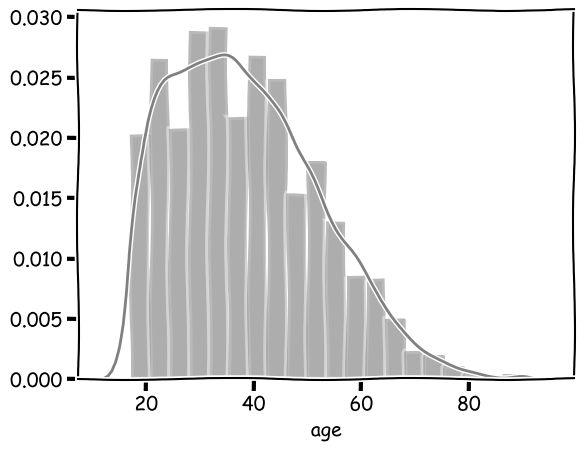

In [33]:
show_all()

Here all data are used to plot the distribution. So we are looking at the global picture. 

Based on this distribution, you can tell it is not completely abnormal to have working adults at the age of 20 or younger, even though they are not as common. So this does occur. 

However, it shows a different distribution when we limit data to the group of people having **Masters or Doctorate** degrees: 

In [34]:
def show_graduate():
    graduate = people[(people['education'] == 'Masters') | (people['education'] == 'Doctorate')]
    sns.distplot(graduate['age'], bins=20)

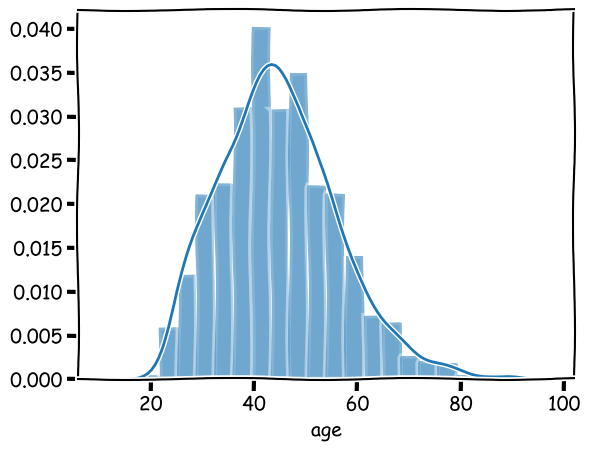

In [35]:
show_graduate()

We can tell that the distribution now is centered around an older age. 

If we assume this to be a normal distribution, it then becomes **very unlikely** for a working adult with a graduate degree to be 20 or younger. These are potential outliers. they are contextual outliers; and the context here is defined by a ```graduate``` education. 

<img src="../figures/outliers/collective.png" alt="data" width="200px" style="float:right;">

Collective outliers: 
+ Collective outliers: outliers as a group deviating from others
+ Need to examine the structure of the data
+ Example relations of data instances: 
    + Temporal data (time series): structure and occurrences in time segments
    + Spatial data: local areas and distributions
    + Graph/network data: subgraphs

Detection of collective outliers: 
1. Structure units, e.g. subsequence, local area, subgraph
2. Reduce data to structure objects, based the units
3. Perform detection based on the structure objects

## References

+ Han, Jiawei and Kamber, Micheline (2011). Data Mining: Concepts and Techniques (3rd Edition). Morgan Kaufmann Publishers, San Francisco.
+ Ian H. Witten, Eibe Frank, Mark A. Hall, Christopher J. Pal (2017). Data Mining: Practical Machine Learning Tools and Techniques (Morgan Kaufmann Series in Data Management Systems) 4th Edition. 
+ https://vincentarelbundock.github.io/Rdatasets/datasets.html
+ https://www.statsmodels.org/stable/install.html